In [1]:
import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats
import sys, os, time, json
from pathlib import Path
import pickle as pkl

sys.path.append('../PreProcessing/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.text import Text

import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
from importlib import reload  # Python 3.4+ only.


In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [3]:
animals = ['Li','Cl']

an = 'Li'

In [98]:
fn = oakPaths['Root'] / (an+'_AnalysesTable.csv')
aTable = pd.read_csv(fn,index_col=0)

fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')

with fn.open(mode="rb") as f:
    sePaths = pkl.load(f)


In [6]:
for se in sePaths.keys():
    if aTable.loc[se]['Clust'] & (sePaths[se]['task']=='T3g'):
            
        fn = sePaths[se]['ZoneAnalyses']
        with fn.open(mode="rb") as f:
            ZoneA = pkl.load(f)

        cell_spikes, mua_spikes = SF.getSessionSpikes(sePaths[se])
        
        PosDat = TMF.getBehTrackData(sePaths[se])
        cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sePaths[se],PosDat['t'])
        cell_FR, mua_FR = SF.getSessionFR(sePaths[se])
        
        break

Loaded Spike Files.
Loading Beh Tracking Data
Complete.
Loading Binned Spikes...
Binned Spike Files Loaded.
Loading FRs ...
FR Loaded.


In [102]:
a=

,Task,Raw,PP,PP_A,Sort,Sort_A,Clust,Clust_A,FR,FR_A,Zone,Trial,TrModels,BehavA
Li_OF_052318,OF,0,0,0,0,0,0,0,0,0,0,0,0,0
Li_OF_052418,OF,0,0,0,0,0,0,0,0,0,0,0,0,0
Li_OF_052518,OF,0,0,0,0,0,0,0,0,0,0,0,0,0
Li_OF_052818,OF,1,1,1,1,1,1,0,0,0,0,0,0,0
Li_OF_052918,OF,1,1,1,1,1,1,0,0,0,0,0,0,0
Li_OF_053018,OF,1,1,1,1,1,1,0,0,0,0,0,0,0
Li_OF_053118,OF,1,1,1,1,0,1,0,0,0,0,0,0,0
Li_OF_060118,OF,1,1,1,1,1,1,0,0,0,0,0,0,0
Li_OF_060418,OF,1,1,1,1,0,1,0,0,0,0,0,0,0
Li_OF_060518,OF,1,1,1,1,1,1,1,0,0,0,0,0,0


In [7]:
PosDat = TMF.getBehTrackData(sePaths[se],0)
cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sePaths[se],PosDat['t'])

Loading Beh Tracking Data
Complete.
Loading Binned Spikes...
Binned Spike Files Loaded.


In [13]:
task = sePaths[se]['task']
date = sePaths[se]['date']

In [14]:
with sePaths[se]['ClusterTable'].open() as f:
    CT = json.load(f)

sessionCellIDs = CT[an][date][task]['cell_IDs']
sessionMuaIDs = CT[an][date][task]['mua_IDs']

In [18]:
SF = reload(SF)
cell_spikes = SF.get_TT_spikes(sessionCellIDs,sePaths[se]['Clusters'])

UnboundLocalError: local variable 'cl' referenced before assignment

In [23]:
tetrodes = []
for ut in ['cells','muas']:
    for unit,tt_cl in ids[ut].items():
        if not (tt_cl[0] in tetrodes):
            tetrodes.append(tt_cl[0])
        
rawdat = {}
for tt in tetrodes:
    temp = np.fromfile(str(sePaths[se]['PreProcessed'] / ('tt_{}.bin'.format(tt))),dtype=np.int16)
    rawdat[tt]= temp.reshape(-1,4)
    
nSamps = len(rawdat[tt])
SR = sePaths[se]['SR']

In [464]:
wf = {}
sp_rej_thr=2
SF = reload(SF)
for ut in ['cells','muas']:
    wf[ut]={}
    if ut=='cells':
        ut_spikes = cell_spikes
    else:
        ut_spikes = mua_spikes
    for unit,tt_cl in ids[ut].items():
        tt = tt_cl[0]
        cl = tt_cl[1]
        spikes = np.array(ut_spikes[tt][cl]).flatten()
        nSp = len(spikes)
        
        X = SF.getSpikeWaveforms(spikes,rawdat[tt])
        badSpikes = SF.getSpikeOutliers(X)
        spikes = spikes[~badSpikes]
        X = SF.getSpikeWaveforms(spikes,rawdat[tt])  
        
        wf[ut][unit] = {}
        wf[ut][unit]['tt']= tt
        wf[ut][unit]['cl']= cl
        
        wf[ut][unit]['nBadSp'] = np.sum(badSpikes)
        wf[ut][unit]['mean'] = np.nanmean(X,0)
        wf[ut][unit]['std'] = np.nanstd(X,0)
        wf[ut][unit]['sem'] = stats.sem(X,0)
        wf[ut][unit]['nSp'] = nSp
        wf[ut][unit]['mFR'] = nSp/nSamps*SR
        
        wf[ut][unit]['tstat'] = stats.ttest_1samp(X,0,axis=0)
        
        # isi in ms
        isi = np.diff(spikes)/SR*1000 
        wf[ut][unit]['isi_h'] = np.histogram(isi,bins=np.linspace(-1,20,25))
        wf[ut][unit]['cv'] = np.std(isi)/np.mean(isi)
        


In [94]:
IDs = sessionCellIDs
cnt = 0
rej_thr=2
SR =  sePaths[se]['SR']
wfi = {}
for tt,cl_ids in IDs.items():
    if len(cl_ids)>0:
        nSamps = len(rawdat[tt])
        for cl in cl_ids:
            spikes = np.array(cell_spikes[tt][str(cl)]).flatten()
            wf = SF.getSpikeWaveforms(spikes,rawdat[tt])
            #wfi[cnt] = 
            badSpikes = SF.getSpikeOutliers(wf,thr = rej_thr)
            wf = wf[~badSpikes,:]
            wfi[cnt] = getWaveformInfo(spikes,wf,nSamps,SR)
            wfi[cnt]['tt'] = tt
            wfi[cnt]['cl'] = cl
            wfi[cnt]['nExcSpikes'] = np.sum(badSpikes)
            cnt+=1

In [99]:
sePaths[se]

{'session': 'Li_T3g_052818',
 'animal': 'Li',
 'task': 'T3g',
 'date': '052818',
 'step': 0.02,
 'SR': 32000,
 'Clusters': PosixPath('/mnt/o/giocomo/alexg/Clustered/Li/Li_T3g_052818_KSClusters'),
 'Raw': PosixPath('/mnt/o/giocomo/alexg/RawData/InVivo/Li/Li_T3g_052818'),
 'PreProcessed': PosixPath('/mnt/o/giocomo/alexg/PreProcessed/Li/Li_T3g_052818_Results'),
 'Analyses': PosixPath('/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses'),
 'ClusterTable': PosixPath('/mnt/o/giocomo/alexg/Clustered/Li/Li_ClusteringSummary.json'),
 'BehavTrackDat': PosixPath('/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses/BehTrackVariables_20ms.h5'),
 'Cell_Spikes': PosixPath('/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses/Cell_Spikes.json'),
 'Cell_WaveForms': PosixPath('/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses/Cell_WaveForms.pkl'),
 'Cell_WaveFormInfo': PosixPath('/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses/Cell_WaveFormInfo.pkl'),
 'Cell_Bin_Spikes': PosixP

In [101]:
SF = reload(SF)
cell_spikes,mua_spikes = SF.getSessionSpikes(sePaths[se],overwrite=1)

Spikes Files not Found or overwrite=1, creating them.


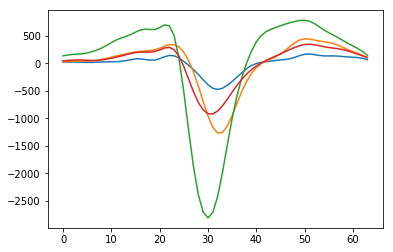

In [38]:
plt.plot(np.mean(wf[~badSpikes,:],0))

In [55]:
wfi[0]['mean'].shape

(64, 4)

In [105]:
a=None
b=None

if ((a is None) or (b is None)):
    print('here')

here


In [40]:
def getWaveformInfo(spikes,waveforms,nSamps,SR):
   
    nSp = len(spikes)
    wfi = {}
    wfi['mean'] = np.nanmean(waveforms,0)
    wfi['std'] = np.nanstd(waveforms,0)
    wfi['sem'] = stats.sem(waveforms,0)
    wfi['nSp'] = nSp
    wfi['tstat'] = stats.ttest_1samp(waveforms,0,axis=0)
    wfi['mFR'] = nSp/nSamps*SR
    
    # isi in ms
    isi = np.diff(spikes)/SR*1000 
    wfi['isi_h'] = np.histogram(isi,bins=np.linspace(-1,20,25))
    wfi['cv'] = np.std(isi)/np.mean(isi)
    return wfi

In [465]:
for ut in ['cells','muas']:
    for unit in wf[ut].keys():
        print(wf[ut][unit]['tt'],wf[ut][unit]['cl'],wf[ut][unit]['nBadSp']/wf[ut][unit]['nSp'])

7 0 0.12278761061946902
7 8 0.09444222814789931
8 0 0.10040186885353024
14 11 0.10396747303343669
2 9 0.06394655213552851
7 5 0.09084167593622544
7 6 0.10649897183300655
7 7 0.09506964404156533
7 9 0.10317801929767925
8 1 0.12206552491199274
8 7 0.12385789604438678
8 10 0.10274959957287774
8 11 0.11950252343186733
10 5 0.10849145023222877
14 3 0.10872391378720493
14 4 0.11800371210558878


In [167]:
for ut in ['cells','muas']:
    for unit,tt_cl in ids[ut].items():
        print

{'cells': {'0': ['7', '0'],
  '1': ['7', '8'],
  '2': ['8', '0'],
  '3': ['14', '11']},
 'muas': {'0': ['2', '9'],
  '1': ['7', '5'],
  '2': ['7', '6'],
  '3': ['7', '7'],
  '4': ['7', '9'],
  '5': ['8', '1'],
  '6': ['8', '7'],
  '7': ['8', '10'],
  '8': ['8', '11'],
  '9': ['10', '5'],
  '10': ['14', '3'],
  '11': ['14', '4']}}

In [81]:

def plotSpikeWFs(wfm,wfstd=None,ax=None):
    if (ax is None):
        f,ax = plt.subplots(1,figsize=(6,4))
        
    sns.set(style="whitegrid",font_scale=1.2,rc={
        'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor':'0.5'})
    
    nSamps,nChan = wfm.shape
    x = np.arange(nSamps)
    ax.plot(x,wfm)
    ax.get_yaxis().set_ticklabels([])
    if not (wfstd is None):
        for ch in np.arange(nChan):
            plt.fill_between(x,wfm[:,ch]-wfstd[:,ch],wfm[:,ch]+wfstd[:,ch],alpha=0.1)
            
    plt.legend(['ch'+str(ch) for ch in np.arange(nChan)],loc='best',frameon=False)
    if nSamps==64:
        ax.get_xaxis().set_ticks([0,16,32,48,64])
        ax.get_xaxis().set_ticklabels(['0','','1','','2'])
        ax.set_xlabel('Time [ms]')
    return ax

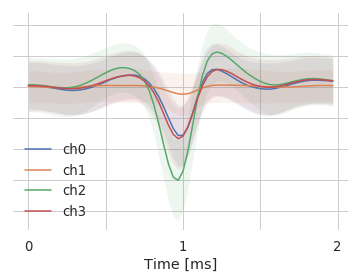

In [108]:
unit = 3
#plotSpikeWFs(wfi[unit]['mean'],wfi[unit]['std'],ax=None)
plotSpikeWFs(wfi[unit]['mean'],wfstd=wfi[unit]['std'])

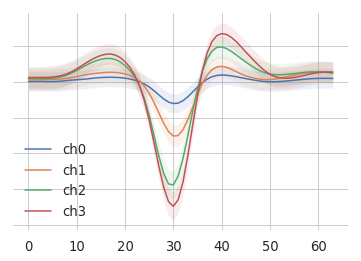

In [214]:
tt='7'
cl='8'
spikes = np.array(cell_spikes[tt][cl]).flatten()
# rsp = np.random.choice(spikes,np.min([np.round(len(spikes)*0.2).astype(np.int),500]),replace=False)
sp_stamps=getSpikeSamps(spikes)
x = np.arange(64)
m=np.mean(rawdat[tt][sp_stamps,:],0)
#s=stats.sem(rawdat['7'][sp_stamps,:],0)
s=np.std(rawdat[tt][sp_stamps,:],0)/4
sns.set(style="whitegrid",font_scale=1.2,rc={
        'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor':'0.5'})

f,ax = plt.subplots(1,figsize=(6,4))
ax.plot(x,m)
ax.get_yaxis().set_ticklabels([])
for ch in np.arange(4):
    plt.fill_between(x,m[:,ch]-s[:,ch],m[:,ch]+s[:,ch],alpha=0.1)
plt.legend(['ch'+str(ch) for ch in np.arange(4)],loc='best',frameon=False)
ax.set_xticks()
#plt.plot(x,)

# t,_=stats.ttest_1samp(rawdat[tt][sp_stamps,:],0,axis=0)
# plt.plot(t)

In [227]:
nSp = len(spikes)
nSamps = len(rawdat[tt])
SR = sePaths[se]['SR']
mFR = nSp/nSamps*SR
print(mFR)

31.23721049814782


In [67]:
a=None
b=None
if not (a or b):
    print('here')

here


In [117]:
np.round(len(spikes)*0.1).astype(np.int)

90

In [109]:
SF.getSessionBinSpikes(sePaths[se])




BrokenPipeError: [Errno 32] Broken pipe: '/mnt/o/giocomo/alexg/Analyses/Li/Li_T3g_052818_Analyses/Cell_Bin_Spikes_20ms.npy'

In [374]:
from sklearn.decomposition import PCA
tt='7'
cl='8'
spikes = np.array(cell_spikes[tt][cl]).flatten()
sp_stamps=getSpikeSamps(spikes)
X = rawdat[tt][sp_stamps,:]
nSp = len(spikes)
Y = np.reshape(X,(nSp,64*4))
pca = PCA(n_components=2)
pca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [384]:
lls = pca.score_samples(Y)
# m = np.mean(lls)
# s = np.std(lls)
# badSpikes = np.abs(lls-m)/s>1
m = np.median(lls)
s = mad(lls)

In [424]:
badSpikes = (np.abs(lls-m)/(s*1.4826))>2

In [385]:
np.where(badSpikes)[0]

array([    9,    10,    43, ..., 47604, 47609, 47621])

(array([1833., 2416., 3348., 4786., 6231., 7644., 8176., 6207., 2276.,
         212.]),
 array([-2041.92456509, -2025.67120192, -2009.41783876, -1993.16447559,
        -1976.91111243, -1960.65774926, -1944.4043861 , -1928.15102293,
        -1911.89765977, -1895.6442966 , -1879.39093344]),
 <a list of 10 Patch objects>)

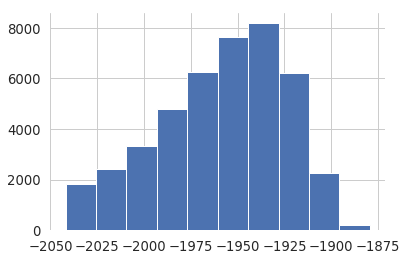

In [425]:
plt.hist(lls[~badSpikes])

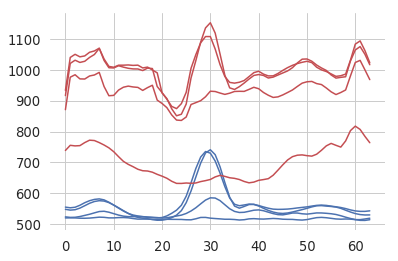

In [426]:
plt.plot(np.std(X[~badSpikes],0),color='b')
plt.plot(np.std(X[badSpikes],0),color='r')

spikes2=spikes[~badSpikes]

(-1, 21)

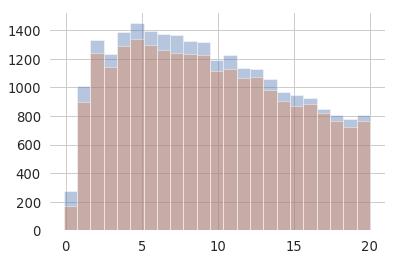

In [422]:
_,ax=plt.subplots(1)
ax=sns.distplot(np.diff(spikes)/SR*1000,bins=np.linspace(-1,20,25),kde=False,ax=ax)
ax=sns.distplot(np.diff(spikes2)/SR*1000,bins=np.linspace(-1,20,25),kde=False,ax=ax)
ax.set_xlim([-1,21])

In [443]:
x=np.histogram(np.diff(spikes)/SR*1000,bins=np.linspace(-1,20,25))

<BarContainer object of 24 artists>

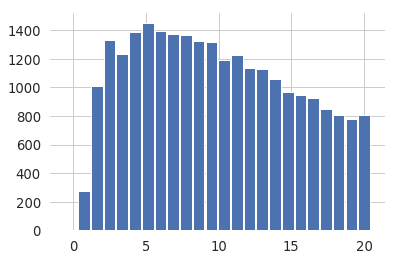

In [421]:
np.std(np.diff(spikes)/SR*1000)/np.mean(np.diff(spikes)/SR*1000),np.std(np.diff(spikes2)/SR*1000)/np.mean(np.diff(spikes2)/SR*1000),

(1.314684769662925, 1.3019133879451585)

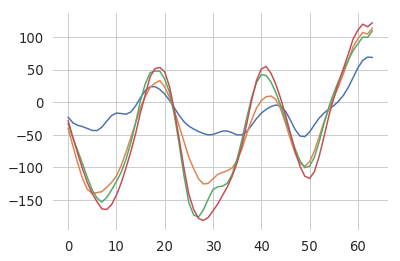

In [427]:
plt.plot(np.mean(X[badSpikes],0)-np.mean(X[~badSpikes],0))

In [399]:
mY = np.mean(Y,0)

In [396]:
Y

array([[  233,   367,   276, ...,   202,  -416,   312],
       [-1363,  -484,  -290, ...,   407,  -156,   232],
       [  479,   923,   546, ...,   351,   328,     1],
       ...,
       [  200,  -302,  -777, ...,   547,   439,   643],
       [ -489,  -361, -1049, ...,  -434,  -190,  -297],
       [  -38,  1917,  1388, ...,  -283,  -216,  -137]], dtype=int16)

In [401]:
cY=np.corrcoef(mY,Y)

In [408]:
pca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [410]:
pca = PCA(n_components=2)

In [411]:
pca.score_samples(Y)

NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.